![](img/logo.png)

# Machine learning with Scikit-learn
## Yoav Ram

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)

import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# conda install -c districtdatalabs yellowbrick
import yellowbrick as yb
import yellowbrick.contrib.classifier
import yellowbrick.regressor 

# call sns after yb imports
sns.set(
    style='ticks',
    context='talk',
    palette='Set1'
)

[![scikit-learn logo](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)](http://scikit-learn.org/)

*Scikit-learn* is a Python package for machine learning:


- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

We will do [one of the many tutorials](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html) from the *scikit-learn* website. 

## Supervised learning

Supervised learning consists in learning the link between two datasets: the observed data `X` and an external variable `y` that we are trying to predict, usually called “target” or “labels”. Most often, `y` is a 1D array of length `n_samples`.

All supervised estimators in *scikit-learn* implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations `X`, returns the predicted labels `y`.

There are two fundamental supervised learning problems: regression and classification.
In regression, we need to predict a number.
In classification, we need to predict a (discrete) class.

# Iris dataset

[Fisher's Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width.

![Iris virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/330px-Iris_virginica.jpg)

Let's start by loading the dataset.

In [5]:
X, y = sklearn.datasets.load_iris(return_X_y=True)
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Classification with K-nearest neighbors (KNN)

The simplest possible classifier is the nearest neighbor: given a new observation `X_test`, find in the training set (i.e. the data used to train the estimator) the observation with the closest feature vector.

**Training set and testing set.** 
While experimenting with any learning algorithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on new data. This is why datasets are often split into train and test data.

Split the dataset to train and test data using a random permutation - this is easily done with functions from the `model_selection` module, which has many methods to split datasets. We'll use a very simple one, `train_test_split` which just splits that data by sampling a fraction of the rows to the training set and the rest to the test set (without replacement).

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Import the nearest-neighbor classifier, then create and fit it:

In [7]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Predict the labels (Iris species) for the test data and compare with the real labels:

In [8]:
y_hat = classifier.predict(X_test)
print(y_hat)
print(y_test)
print('Accuracy:', classifier.score(X_test, y_test))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2]
Accuracy: 0.98


# Reduce dimensions

To reduce the dimensionality of the problem (4 features - 4D) we can use *Seaborn*'s `PairGrid` plot to look at the joint distributions of each pair of features.

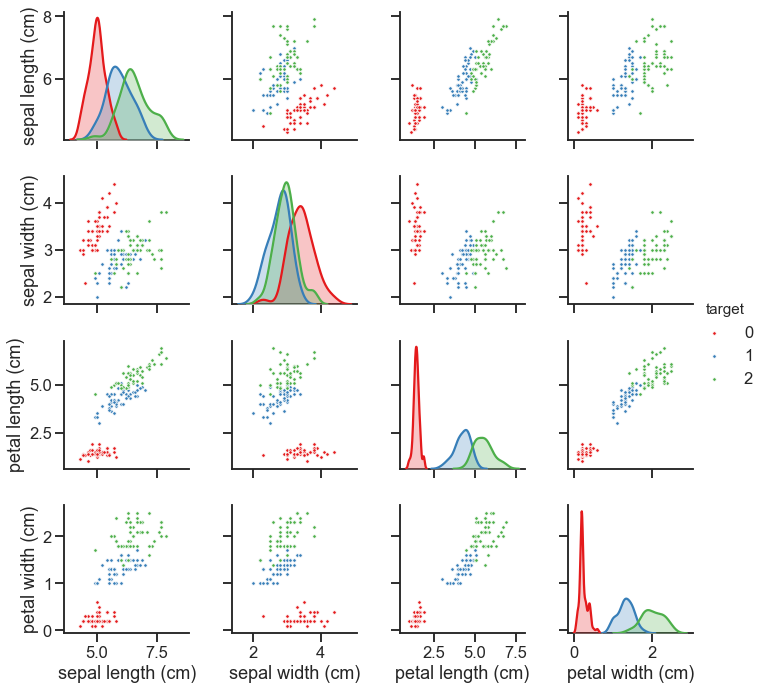

In [13]:
sns.pairplot(df, vars=feature_names, hue='target', plot_kws={'s': 12});

From this figure it seems like using just the petal (last two columns in our features matrix) will do a produce a good separation between blue and others, and a decent one between green and red.

Let's try it.

In [14]:
X_train = X_train[:, 2:]
X_test = X_test[:, 2:]

In [10]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_hat = classifier.predict(X_test)
print(y_hat)
print(y_test)
print('Accuracy:', classifier.score(X_test, y_test))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2]
Accuracy: 0.98


We didn't gained any accuracy, but that's expected as the test set size is just 50.

But as we are in 2D. we can plot the classifier decision boundaries using the [Yellowbrick](https://www.scikit-yb.org/en/latest/gallery.html) package [DecisionViz](https://www.scikit-yb.org/en/latest/api/contrib/boundaries.html) visualizer.

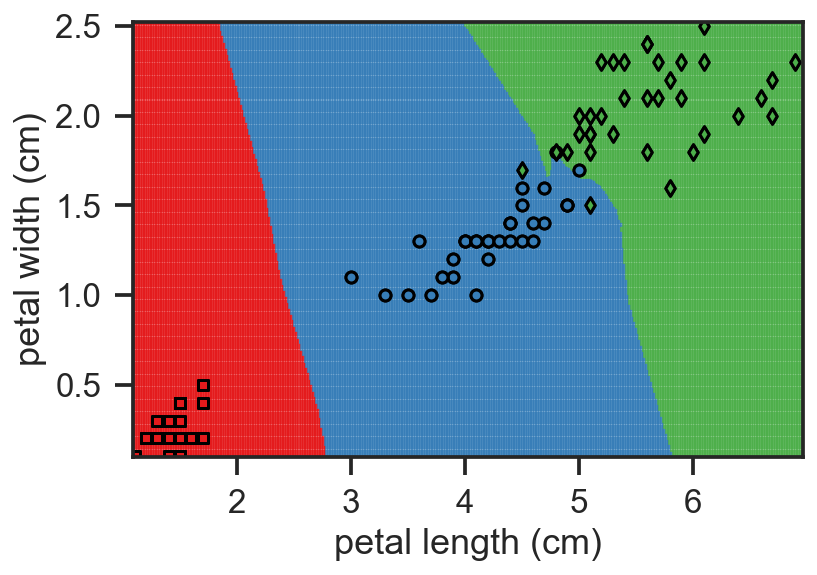

In [16]:
viz = yb.contrib.classifier.DecisionViz(KNeighborsClassifier(), markers='o', pcolormesh_alpha=0.7)
viz.fit(X_train, y_train)
viz.draw(X_train, y_train)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3]);

# Regression

Now we try to predict a continuous variable $y$ 

We'll work with the diabetes dataset:
> Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

In [27]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True)
feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
n_features = len(feature_names)

df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Let's look at the features (`X`):

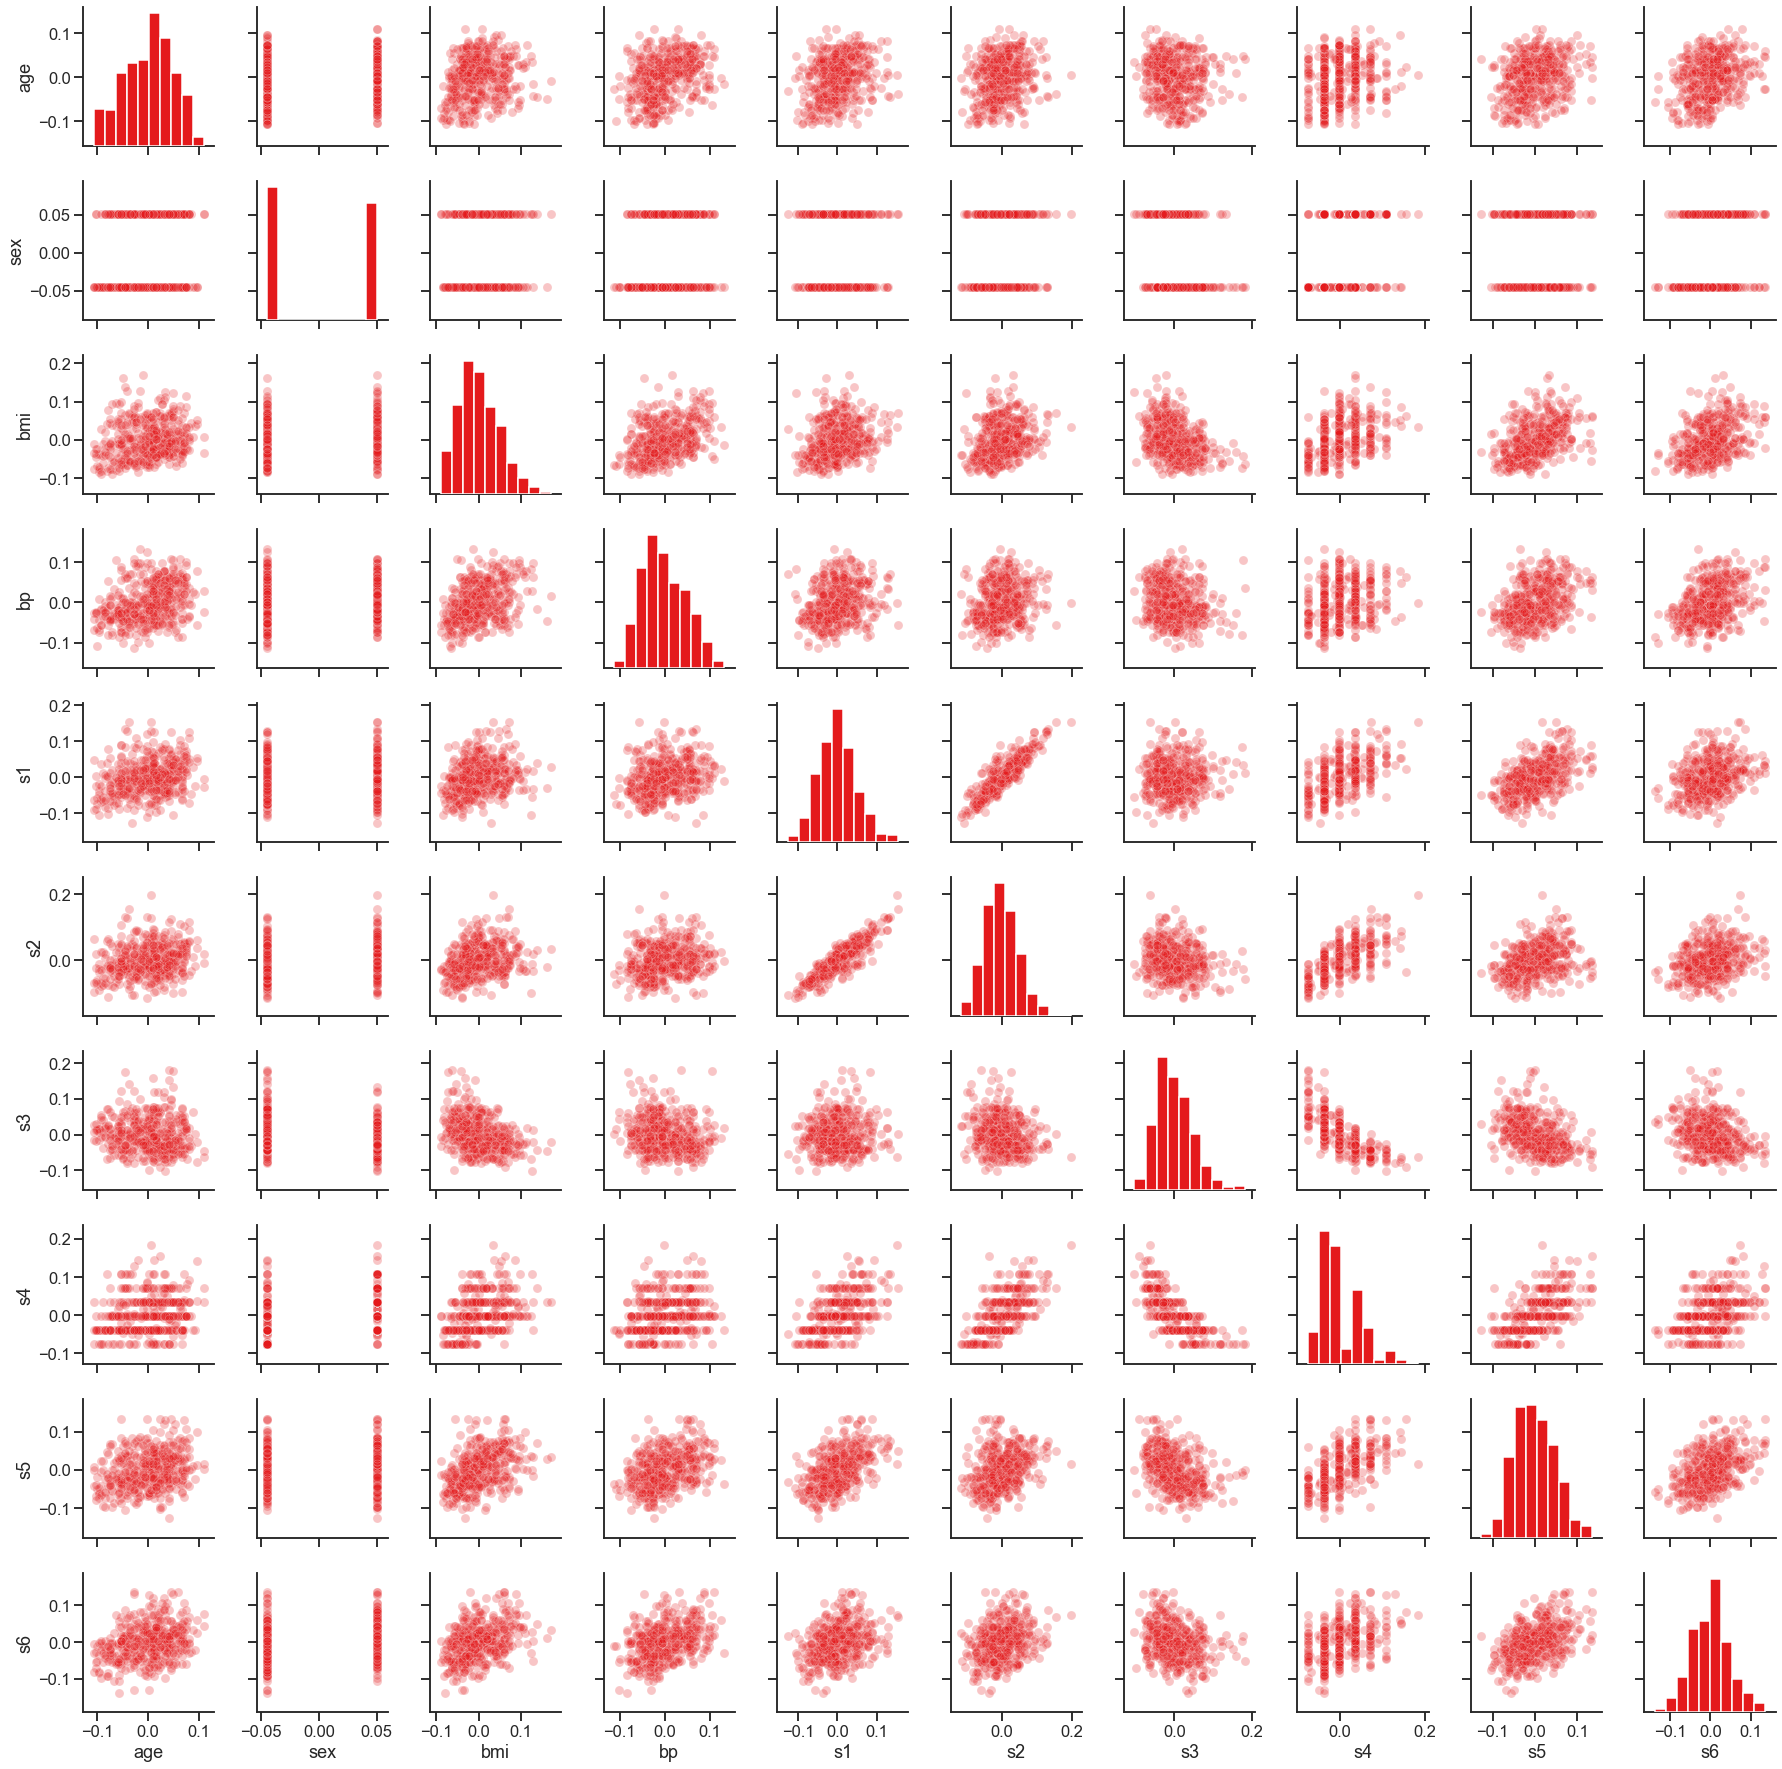

In [3]:
df = pd.DataFrame(data=X, columns=feature_names)
sns.pairplot(df, plot_kws=dict(alpha=0.25));

Let's look at the distribution of the target (`y`):

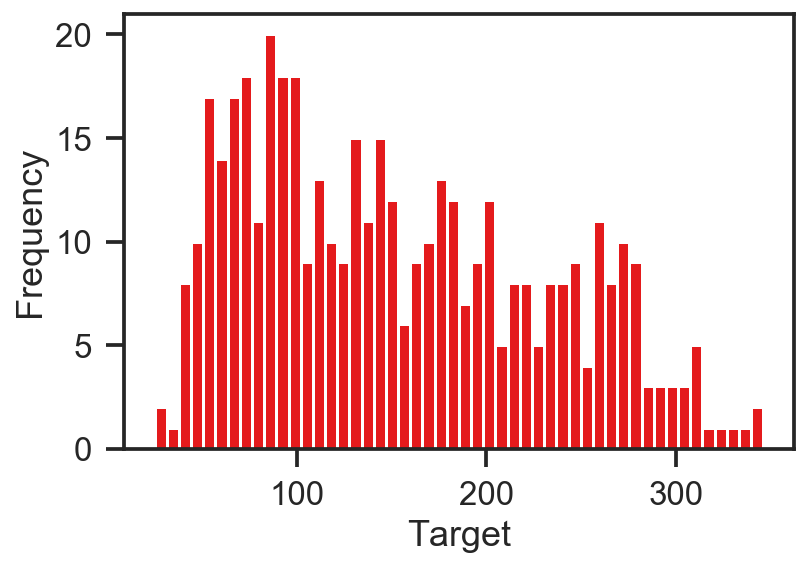

In [28]:
plt.hist(y, bins=50)
plt.xlabel('Target')
plt.ylabel('Frequency');

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Let's use a linear model to do regression.

We assume that $y$ is a linear function of $x$:

$$ \hat{y} = a_0 + a_1 x_1 + \ldots + a_m x_m $$

We use scikit-learn to find $a_j$ such that the model fit is optimal, that is, the following function is minimized:

$$
f(a_1, \ldots, a_m) = \frac{1}{n} \sum_{i=1}^{n}{(\hat{y}_i - y_i)^2}
$$
where $i$ is the i-th sample out of $n$ samples.

Lets run the regression and print the model score, which is the $R^2$ -- the fraction of variance in the target explained by the model.

In [30]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)
y_hat = regressor.predict(X_test)
score = regressor.score(X_test, y_test)
print('Linear model score: {:.2f}'.format(score))

Linear model score: 0.36


How good is the model? We can use Yellowbrick to plot two diagnostic plots:
- a **residual plot** shows the residual ($\hat{y}-y$) distribution. Zero residuals are good, and we expect a normal distribution around zero.
- a **prediction error plot** shows the $\hat{y}$ vs $y$ together with a one-to-one line. We would like the markers to be close to the line and the cloud of markers to be roughly symmetric around the line.

R2=0.36


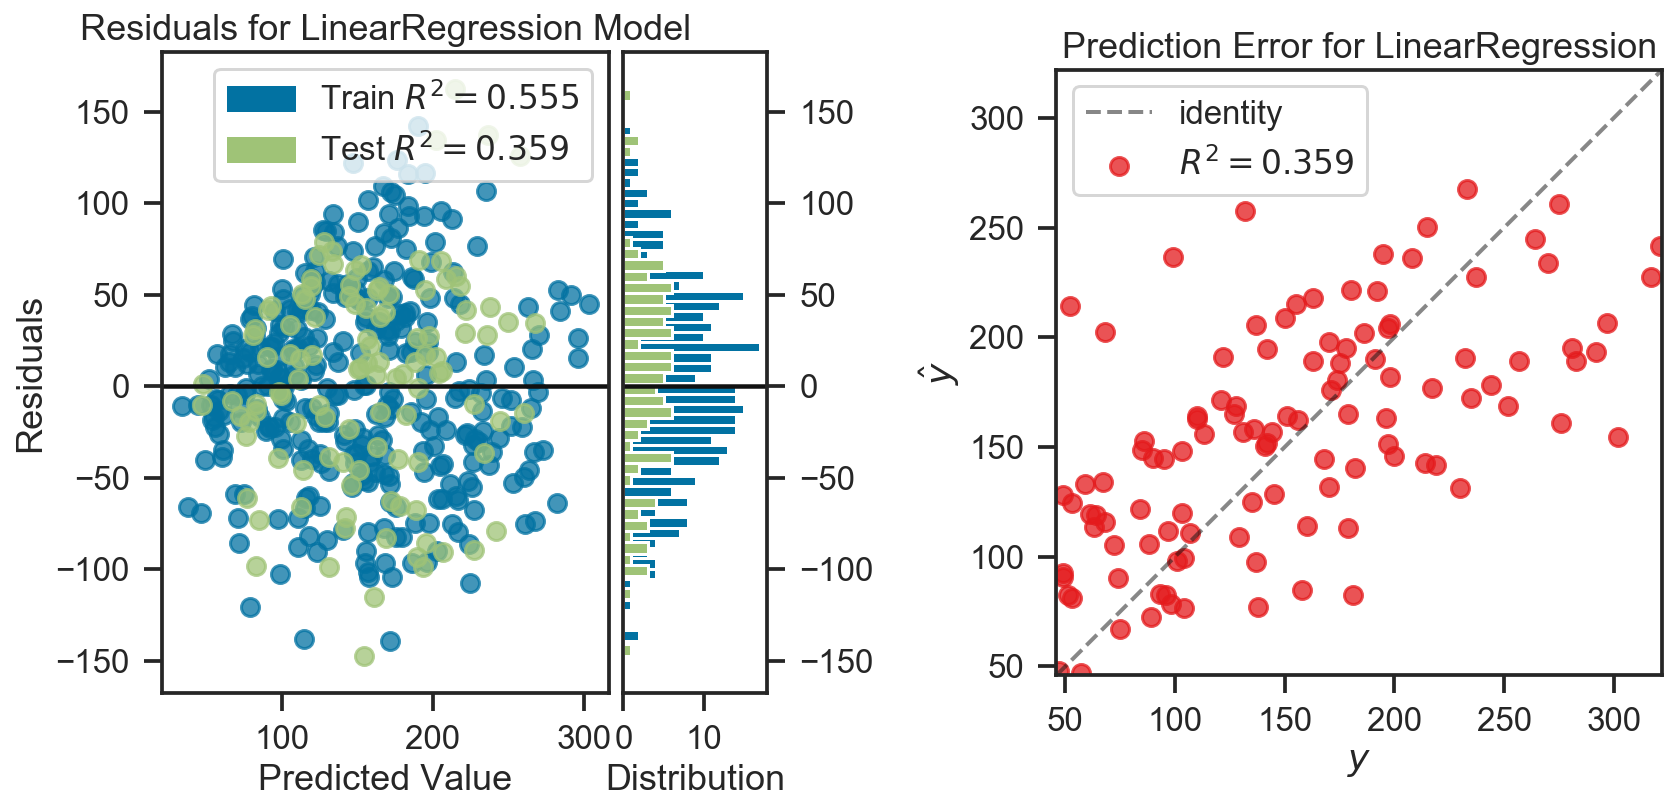

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

viz = yb.regressor.ResidualsPlot(regressor, is_fitted=True, ax=axes[0])
viz.fit(X_train, y_train) # blue markers
R2 = viz.score(X_test, y_test) # green markers
viz.finalize() # adds the lines
print("R2={:.2f}".format(R2))

viz = yb.regressor.PredictionError(regressor, is_fitted=True, line_color='k', bestfit=False, ax=axes[1])
# viz.fit(X_train, y_train) # not needed here
viz.score(X_test, y_test) 
viz.finalize() # adds the line

# for ax in axes.flat: ax.legend().set_visible(False)
fig.tight_layout()

One of the advantages of a linear model is that we can interpret the coefficients as the contribution of the features to the predicted value.

The following shows us the linear contribution (hight of bar) and direction (color) of each feature.

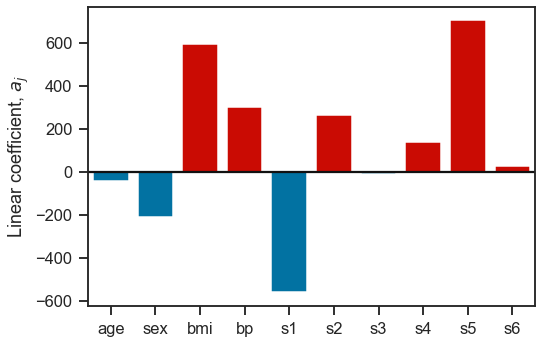

In [15]:
coefs = regressor.coef_
coefs_idx = np.arange(len(coefs))
pos_coefs = coefs > 0
neg_coefs = coefs < 0

fig, ax = plt.subplots()

ax.bar(coefs_idx[pos_coefs], coefs[pos_coefs], color='r')
ax.bar(coefs_idx[neg_coefs], coefs[neg_coefs], color='b')
ax.axhline(0, color='k')
ax.set_ylabel('Linear coefficient, $a_j$');
ax.set_xticks(coefs_idx)
ax.set_xticklabels(feature_names)
ax.set_xlim(-0.5, coefs_idx.max()+0.5);

We can also check for sample outliers with [Cook's distance](https://www.scikit-yb.org/en/latest/api/regressor/influence.html), which measures the influence of each sample on the model fit: samples with a large influence on the fit are suspicious.

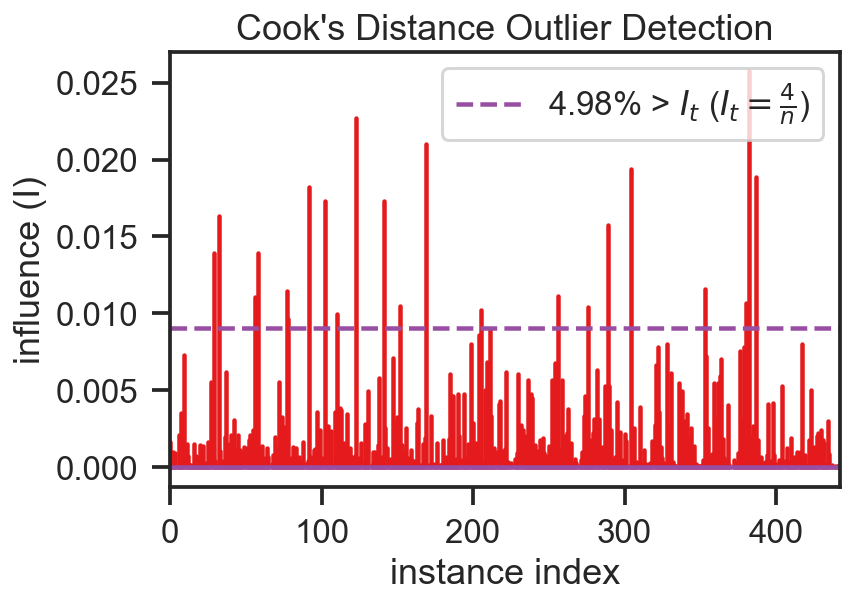

In [57]:
visualizer = yb.regressor.CooksDistance()
visualizer.fit(X, y)
visualizer.show();

## Exercise: Lasso

Now experiment with the Lasso model from the `linear_model` package ([Lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)): least absolute shrinkage and selection operator).

Lasso is a linear model that performs _regularization_: avoiding giving too much weight to any single feature. 
This is done by minimizing not just the sum of residual squares between the model predictions and the observed values (the fit), but also the sum of the absolute values of the model coefficients (the penalty):

$$
\hat{y} = a_0 + a_1 x_1 + \ldots + a_m x_m \\
f(a_1, \ldots, a_m) = \frac{1}{2n} \sum_{i=1}^{n}{(\hat{y}_i - y_i)^2} + \alpha \sum_{j=1}^{m} |a_j|
$$

This is useful for feature selection, that is, finding features that are less important and therefore get a zero coefficeint. 
Thus, is increases prediction accuracy as well as interpretability of the linear model.

A meta-parameter $\alpha$ is used to weight the penalty relative to the fit: the higher $\alpha$, the more weight is given to the penalty.

**Repeat the analysis from above with a Lasso model**.

**Reminder**
- Edit cell by double clicking
- Run cell by pressing _Shift+Enter_
- Get autocompletion by pressing _Tab_
- Get documentation by pressing _Shift+Tab_

Lasso model score: 0.36


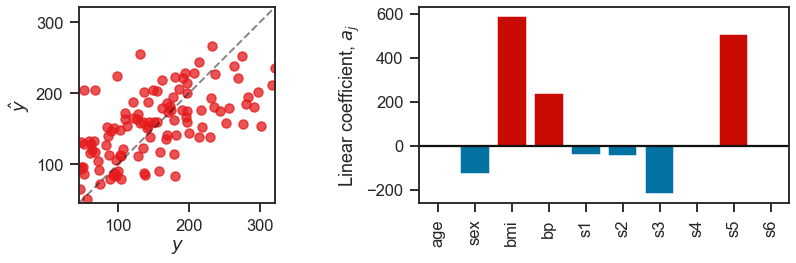

In [51]:
# your code here

**Bonus**:
to avoid choosing your own $\alpha$, try the `LassoCV` model (from scikit-learn) with the `AlphaSelection` visualization (from yellowbrick).

LassoCV α: 0.087
LassoCV model score: 0.36


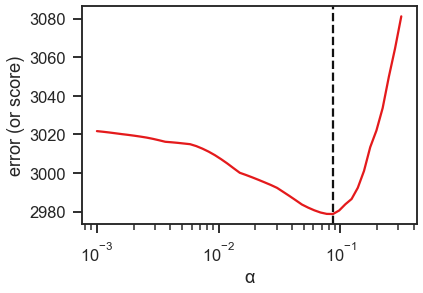

In [67]:
# your code here

# References

- Scikit-learn [supervised learning tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html).
- [Tuning meta-parameters](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) with cross validation.
- [Yellowbrick gallery](https://www.scikit-yb.org/en/latest/gallery.html)

# Futher exercise

- [Regression with a linear model](../exercises/linear-model.ipynb)
- [Classification with a logistic model](../exercises/logistic-tennis.ipynb)

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

The notebook was written using [Python](http://python.org/) 3.7.
Dependencies listed in [environment.yml](../environment.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)